In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
bank = pd.read_csv('bank-full.csv', delimiter=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
#1 - age (numeric)
#2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
#"blue-collar","self-employed","retired","technician","services")
#3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
#4 - education (categorical: "unknown","secondary","primary","tertiary")
#5 - default: has credit in default? (binary: "yes","no")
#6 - balance: average yearly balance, in euros (numeric)
#7 - housing: has housing loan? (binary: "yes","no")
#8 - loan: has personal loan? (binary: "yes","no")
## related with the last contact of the current campaign:
#9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
#10 - day: last contact day of the month (numeric)
#11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
#12 - duration: last contact duration, in seconds (numeric)
# other attributes:
#13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
#15 - previous: number of contacts performed before this campaign and for this client (numeric)
#16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
#Output variable (desired target):
#17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [4]:
bank['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [5]:
#1 - Qual profissão tem mais tendência a fazer empréstimo? De qual tipo?
#2 - Fazendo uma relação entre número de contatos e sucesso da campanha, quais os pontos relevantes a serem oservados?
#3 - Baseando-se nos resultados de adesão desta campanha, qual o número médio e o máximo de ligações que você indica para otimizar a adesão?
#4 - O resultado da campanha anterior tem relevância na campanha atual?
#5 - Quais as características mais proeminentes de um cliente que possua empréstimo imobiliário?

In [6]:
#1 - O trabalhador blue-collar é aquele que mais tem tendência a pegar empréstimo pra habitação. Isso pode ser visto no gráfico de barras entitulado 
#'Empréstimo habitacional' e no dataframe df_housing. No gráfico pode ser visto que a maioria dos trabalhadora blue-collar pedem empréstimo habitacional
#(variável job_sim, em azul). No dataframe a diferença fica clra, quando podemos ver que aproximadamente 72% dos trabalhadores blue-collar pedem 
#empréstimo habitacional

<Axes: title={'center': 'Empréstimo pessoal'}, xlabel='job'>

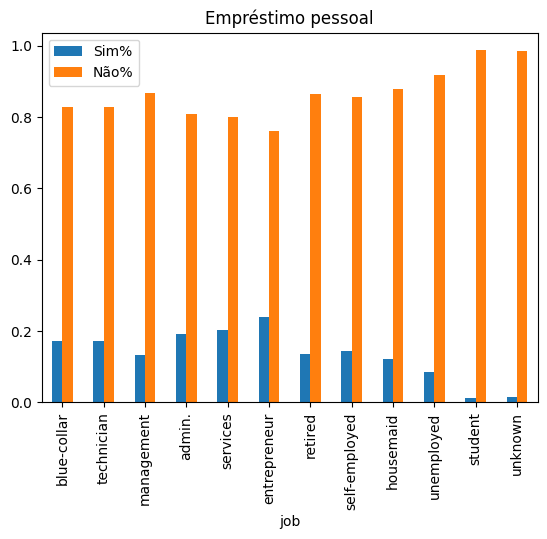

In [5]:
Sim_loan = bank[bank.loan=='yes']
df_sim_loan = pd.DataFrame(Sim_loan['job'].value_counts())
Não_loan = bank[bank.loan=='no']
df_não_loan = pd.DataFrame(Não_loan['job'].value_counts())
df_loan = pd.concat([df_sim_loan, df_não_loan], axis = 1)
df_loan.columns = ['Sim','Não']
df_loan['total'] = df_loan.Sim+df_loan.Não
df_loan['Sim%'] = df_loan.Sim/df_loan.total
df_loan['Não%'] = df_loan.Não/df_loan.total
df_plot_loan = df_loan[['Sim%','Não%']]
df_plot_loan.plot.bar(title='Empréstimo pessoal')

<Axes: title={'center': 'Empréstimo habitacional'}, xlabel='job'>

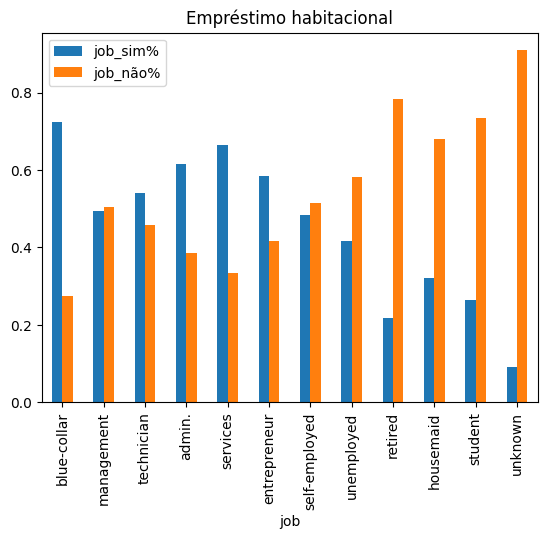

In [6]:
Sim_housing = bank[bank.housing=='yes']
df_sim_housing = pd.DataFrame(Sim_housing['job'].value_counts())
Não_housing = bank[bank.housing=='no']
df_não_housing = pd.DataFrame(Não_housing['job'].value_counts())
df_housing = pd.concat([df_sim_housing, df_não_housing], axis = 1)
df_housing.columns = ['job_sim','job_não']
df_plot = df_housing
df_housing['total'] = df_housing.job_sim+df_housing.job_não
df_housing['job_sim%'] = df_housing.job_sim/df_housing.total
df_housing['job_não%'] = df_housing.job_não/df_housing.total
df_plot = df_housing[['job_sim%','job_não%']]
df_plot.plot.bar(title='Empréstimo habitacional')

In [9]:
#2 - A porcentagem de pessoas que já tiveram contato antes entre os de resposta yes é mais do que o dobro entre as de respostas não

In [10]:
#Pessoas que tiveram resposta Sim.
bank_sim = bank[(bank.y=='yes')]
#Resposta sim com contato anterior. 
#Pessoas que fizeram o depósito (variável y) e estão no segundo (ou superior) contato
bank_sim_pdays = bank_sim[(bank_sim.pdays!=-1)]
#Pessoas ganharam o depósito e tiveram algum contato com a empresa na campanha anterior.
bank_sim_pdays.shape[0]/bank_sim.shape[0]

0.3601815087918321

In [11]:
bank_não = bank[(bank.y=='no')]
bank_não_pdays = bank_não[(bank_não.pdays!=-1)]
#Pessoas não ganharam o depósito e tiveram algum contato com a empresa na campanha anterior
bank_não_pdays.shape[0]/bank_não.shape[0]

0.15911026501678271

In [12]:
#2 - Em termos de porcentagem, quem recebeu o primeiro contato aderiu aproximadamente 15% a menos à campanha
bank_nao_previamente_contatado = bank[bank.pdays==-1]
display("Quem não recebeu contato na campanha anterior")
display(bank_nao_previamente_contatado['y'].value_counts()/bank[bank.pdays==-1]['y'].value_counts().sum())
bank_previamente_contatado = bank[bank.pdays!=-1]
display("Quem recebeu contato na campanha anterior")
display(bank_previamente_contatado['y'].value_counts()/bank[bank.pdays!=-1]['y'].value_counts().sum())

'Quem não recebeu contato na campanha anterior'

y
no     0.908427
yes    0.091573
Name: count, dtype: float64

'Quem recebeu contato na campanha anterior'

y
no     0.769287
yes    0.230713
Name: count, dtype: float64

In [13]:
#2 - As pessoas que fizeram o depósito (variável y) e estão no segundo (ou superior) contato demoraram mais, em média, ao telefone do que aquelas que não compraram 
#e estão no segundo contato. Isso nos leva a crer que o tempo que o tempo que a atendente (pessoa que ligou pro cliente) passou conversando com o cliente
#pode ter influenciado na decisão
display("Média da duração das ligações das pessoas com resposta sim com contato anterior.")
display(bank_sim_pdays.duration.mean())
display("Média da duração das ligações das pessoas com resposta não com contato anterior.")
display(bank_não_pdays.duration.mean())

'Média da duração das ligações das pessoas com resposta sim com contato anterior.'

407.25984251968504

'Média da duração das ligações das pessoas com resposta não com contato anterior.'

215.99023929471034

In [14]:
#As pessoas que não compraram receberam, em média, mais contatos nessa campanhan
display("Média do número de contatos das pessoas que fizeram o depósito")
display(bank_sim_pdays.campaign.mean())
display("Média do número de contatos das pessoas que não fizeram o depósito")
display(bank_não_pdays.campaign.mean())

'Média do número de contatos das pessoas que fizeram o depósito'

1.7879265091863517

'Média do número de contatos das pessoas que não fizeram o depósito'

2.1366498740554154

In [15]:
#Quem recebeu mais de um contato nessa campanha comprou 5% menos do que os que receberam apenas um contato.
bank_recebeu_mais_de_um_contato = bank[bank.campaign>1]
display("Porcentagem das pessoas que tiveram mais de um contato nessa campanha e fizeram o depósito")
display(bank_recebeu_mais_de_um_contato.y.value_counts()/bank_recebeu_mais_de_um_contato.y.value_counts().sum())
bank_recebeu_um_contato = bank[bank.campaign==1]
display("Porcentagem das pessoas que tiveram apenas um contato nessa campanha e fizeram o depósito")
display(bank_recebeu_um_contato.y.value_counts()/bank_recebeu_um_contato.y.value_counts().sum())

'Porcentagem das pessoas que tiveram mais de um contato nessa campanha e fizeram o depósito'

y
no     0.901399
yes    0.098601
Name: count, dtype: float64

'Porcentagem das pessoas que tiveram apenas um contato nessa campanha e fizeram o depósito'

y
no     0.854024
yes    0.145976
Name: count, dtype: float64

In [16]:
#3 - Baseando-se nos resultados de adesão desta campanha, qual o número médio e o máximo de ligações que você indica para otimizar a adesão?
#3 1.78 e 11. Esses números foram calculados de maneira muito simples. Talvez algo mais aprofundado desse números melhores.
#Pessoas que fizeram o depósito (variável y) e estão no segundo (ou superior) contato tem qual a quantidade média e máxima de contatos?
#Como estamos falando em otimizar, inicialmente pegamos apenas as pessoas que fizeram o depósito.
#Posteriormente, podemos pensar em algo diferente.
display("Dentre as pessoas que fizeram ligações e fizeram o depósito, quem recebeu mais contatos recebeu:")
bank_sim_pdays.campaign.max()
display("Em média, as pessoas que fizeram ligações e fizeram o depósito receberam esse número de contatos:")
bank_sim_pdays.campaign.mean()

'Dentre as pessoas que fizeram ligações e fizeram o depósito, quem recebeu mais contatos recebeu:'

'Em média, as pessoas que fizeram ligações e fizeram o depósito receberam esse número de contatos:'

1.7879265091863517

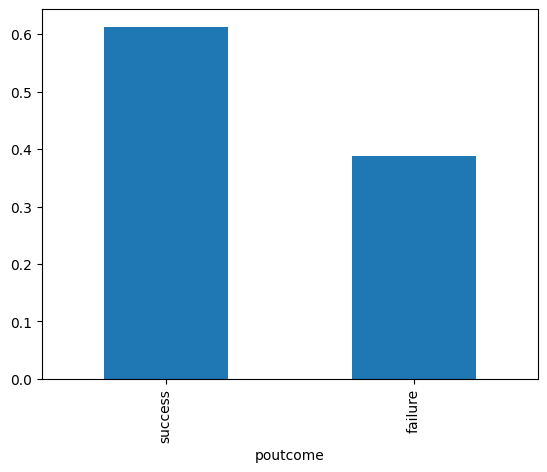

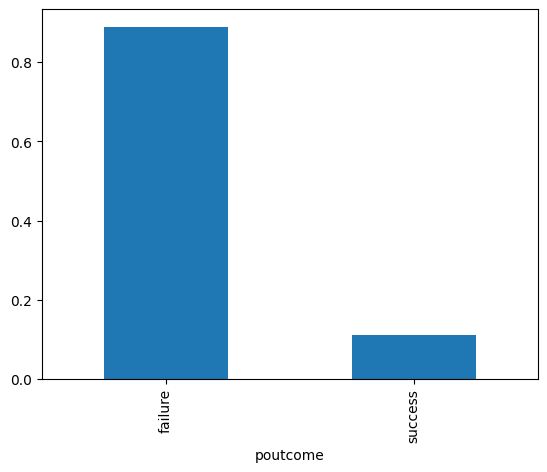

In [17]:
#4 - O resultado da campanha anterior tem relevância na campanha atual?
#4- sim. Percebe-se que, o resultado da campanha anterior influencia na campanha atual.
#Considerando apenas os cliente que se sabe que tiveram sucesso ou falha (desconsiderando unknown e outros):
#dentre os que tiveram sucesso nessa campanha, os que tiveram sucesso anterior é maioria.

#Pessoas com sucesso nessa campanha e que na anterior tiveram sucesso ou fracasso (excluindo-se o unkown)
bank_poutcome_yes = bank_sim[(bank_sim.poutcome=='success') | (bank_sim.poutcome=='failure')]
#Faz a contagem por possíveis valores - success failure
  = bank_poutcome_yes.poutcome.value_counts()
#Conta o total pra fazer a porcentagem
total = bank_poutcome_yes.sum()
#Calcula as porcentagens
bank_poutcome_yes = bank_poutcome_yes/total
#Cria a imprime os gráficos
bank_poutcome_yes.plot.bar()
plt.show()

#O mesmo acontece dentre os que tiveram fracasso. Ou seja,  
#Dentre os que tiveram fracasso nessa campanha, os que tiveram fracasso anterior é maioria

#Pessoas sem sucesso nessa campanha e que na anterior tiveram sucesso ou fracasso (excluindo-se o unkown)
bank_poutcome_no = bank_não[(bank_não.poutcome=='success') | (bank_não.poutcome=='failure')]
#Faz a contagem por possíveis valores - success failure
bank_poutcome_no = bank_poutcome_no.poutcome.value_counts()
#Conta o total pra fazer a porcentagem
total = bank_poutcome_no.sum()
#Calcula as porcentagens
bank_poutcome_no = bank_poutcome_no/total
#Cria a imprime os gráficos
bank_poutcome_no.plot.bar()
plt.show()

<Axes: xlabel='y'>

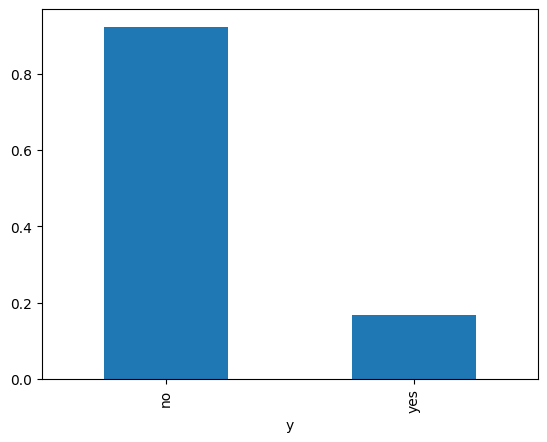

In [18]:
#6 Na questão 6, apesar de o pedido ter sido relacionado a quem fez o empréstimo imobiliário, foram mostrados dados de quem não fez o emprésimo
#para comparação. Se o comportamento fosse igual nas duas situações, ele não poderia ser considerado proeminente em uma delas.
#Dentre os que pediram empréstimo imobiliário, mais de 90% não depositou (sucesso na campanha)
(Sim_housing['y'].value_counts()/Sim_housing['y'].value_counts().sum()).plot.bar()
# Enquanto dentre os que não tiveram empréstimo, 'apenas' 80% não fez o depósivo
(Não_housing['y'].value_counts()/Não_housing['y'].value_counts().sum()).plot.bar()

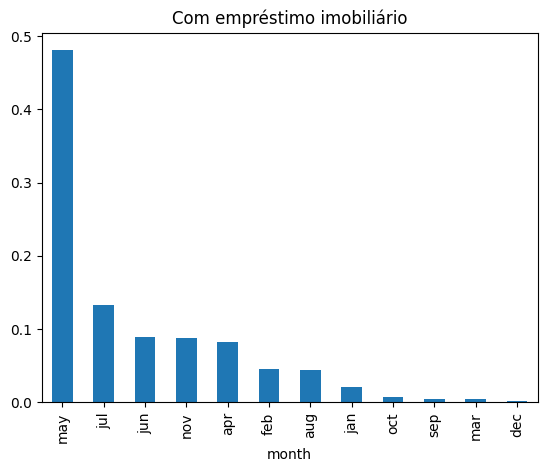

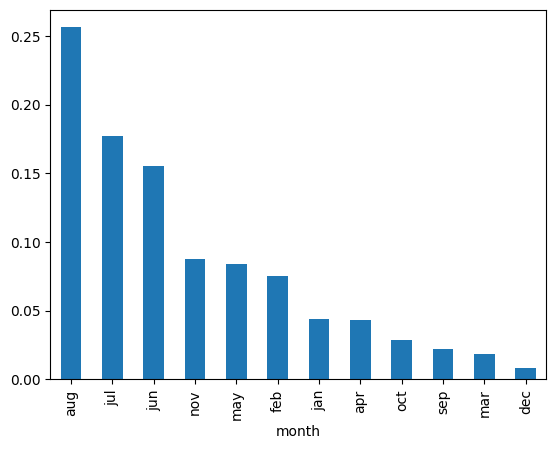

In [19]:
#5 - Quais as características mais proeminentes de um cliente que possua empréstimo imobiliário?
#Dentre os que pediram empréstimo imobiliário, quase 50% teve último contato em maio
(Sim_housing['month'].value_counts()/Sim_housing['month'].value_counts().sum()).plot.bar(title='Com empréstimo imobiliário')
plt.show()
# Enquanto dentre os que não tiveram empréstimo, quase 50% teve o último contato em agosto
(Não_housing['month'].value_counts()/Não_housing['month'].value_counts().sum()).plot.bar('Sem empréstimo imobiliário')
plt.show()

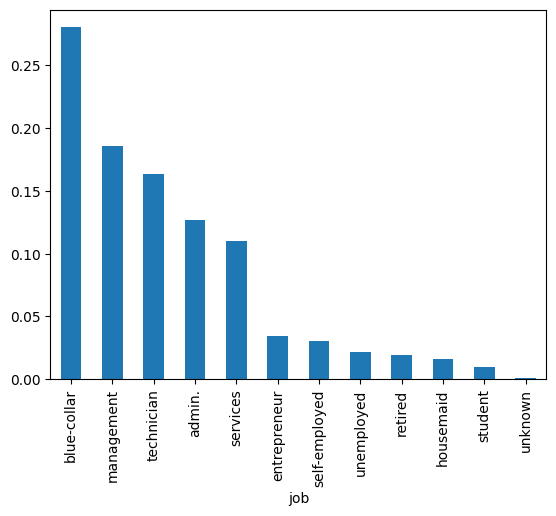

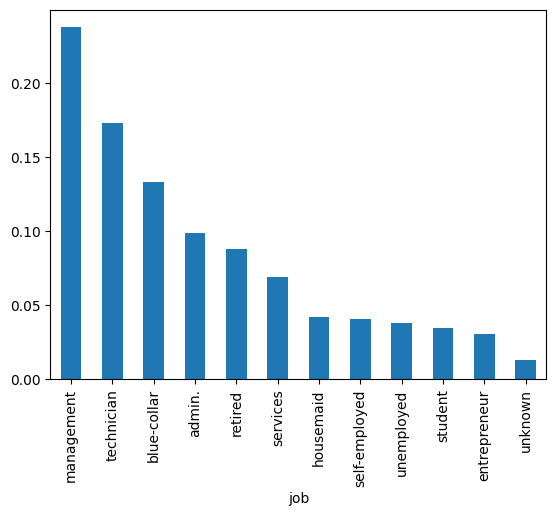

In [20]:
#5
#Dentre os que pediram empréstimo imobiliário, quase 30% é trabalhador blue-collar (profissão com maior percentual)
(Sim_housing['job'].value_counts()/Sim_housing['job'].value_counts().sum()).plot.bar()
plt.show()
# Enquanto dentre os que não tiveram empréstimo, quase 30% é gerente (profissão com maior percentual)
(Não_housing['job'].value_counts()/Não_housing['job'].value_counts().sum()).plot.bar()
plt.show()

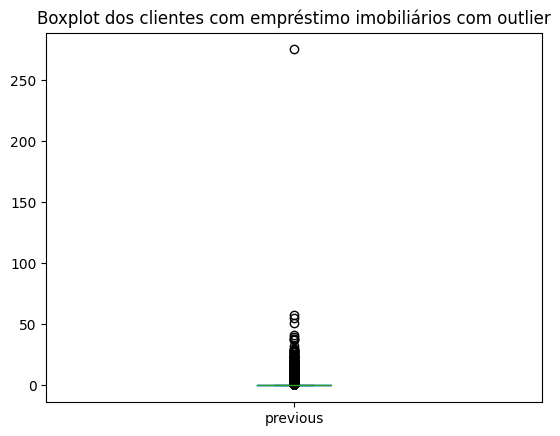

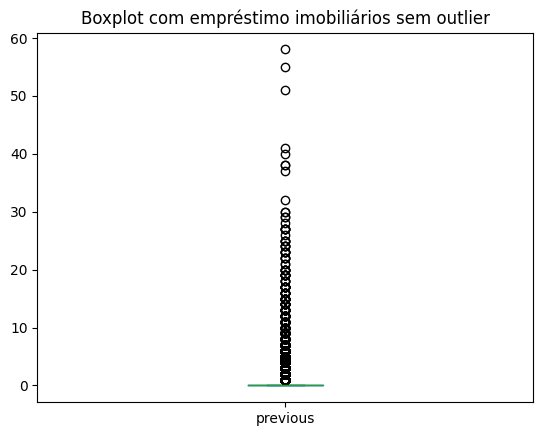

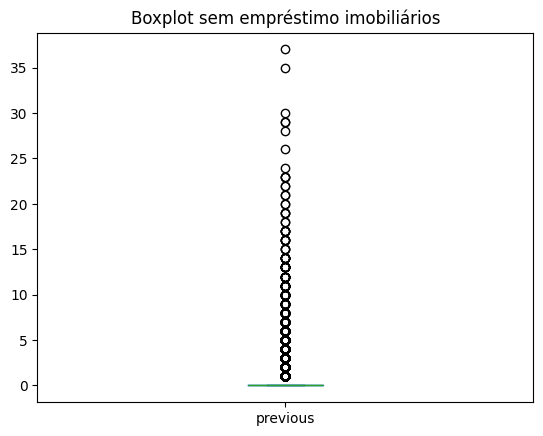

In [31]:
#6
#Dentre aqueles que pediram empréstimo imobiliário existe uma pessoa que recebeu 275 contatos antes dessa campanha.
Sim_housing.previous.plot.box(title='Boxplot dos clientes com empréstimo imobiliários com outlier')
plt.show()
Sim_housing_sem_outlier = Sim_housing[Sim_housing.previous<275]
Sim_housing_sem_outlier.previous.plot.box(title='Boxplot com empréstimo imobiliários sem outlier')
plt.show()
Não_housing.previous.plot.box(title='Boxplot sem empréstimo imobiliários')
plt.show()

In [30]:
#6
#Percebe-se que, mesmo sem o outlier, a média de contatos recebidos dentre aqueles com empréstimo imobiliário é maior.
#Isso pode ser confirmado através dos cálculos mostrados abaixo
display(Sim_housing.previous.mean())
display(Não_housing.previous.mean())

0.6566653402307998

0.4847866142124396

(25130, 17)

In [23]:
#6
#Dentre os que tem empréstimo imobiliário, aproximadamente 8% fez o depósito 
display(Sim_housing[Sim_housing.y=='yes'].shape[0]/Sim_housing.shape[0])
display(Sim_housing[Sim_housing.y=='no'].shape[0]/Sim_housing.shape[0])
#Dentre os que não tem empréstimo imobiliário, aproximadamente 17% fez o depósito 
display(Não_housing[Não_housing.y=='yes'].shape[0]/Não_housing.shape[0])
display(Não_housing[Não_housing.y=='no'].shape[0]/Não_housing.shape[0])

0.07699960206923995

0.92300039793076

0.1670235546038544

0.8329764453961456

In [24]:
#6 - Umas das formas de se testar a importância das variáveis é criando um modelo e estudando o mod
#Aplicando-se uma árvore de decisão, se percebe que dentre os que pediram empréstimo imobiliário, a duração das ligações parece ter uma influência
#considerável no momento de se decidir se vai comprar o produto. Dentre os que não pediram empréstimo imobiliário a influência existe, mas é quase 10% menor

In [25]:
Numéricos = Sim_housing[['age','balance','day','duration','campaign','pdays','previous']]
Categóricos = Sim_housing[['job','marital','education','default','housing','loan','contact','month','poutcome']]
Categóricos = pd.get_dummies(Categóricos)
X = pd.concat([Numéricos, Categóricos], axis = 1)
y = Sim_housing.y
#Cria a árvore de decisão e calcula a acurácia
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    display("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color=['red','blue'], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


KeyboardInterrupt



In [ ]:
Numéricos = Não_housing[['age','balance','day','duration','campaign','pdays','previous']]
Categóricos = Não_housing[['job','marital','education','default','housing','loan','contact','month','poutcome']]
Categóricos = pd.get_dummies(Categóricos)
X = pd.concat([Numéricos, Categóricos], axis = 1)
y = Não_housing.y
#Cria a árvore de decisão e calcula a curácia
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    display("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color=['red','blue'], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# 6
#A influência pode ser vista aqui. Inclusive, a diferença entre as média é muito maior quando houve emprésimo imobiliário, 
#como pode ser visto nas árvores (importância de 0.33 quando houve empréstimo e 0.24 quando não houve).
display(Sim_housing[Sim_housing.y=='yes'].duration.mean())
display(Sim_housing[Sim_housing.y=='no'].duration.mean())
display(Não_housing[Não_housing.y=='yes'].duration.mean())
display(Não_housing[Não_housing.y=='no'].duration.mean())

In [32]:
y

0         no
1         no
2         no
3         no
5         no
        ... 
45191    yes
45194     no
45197    yes
45199     no
45200    yes
Name: y, Length: 25130, dtype: object